In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [2]:
df = pd.read_csv("D:\Data_Sets\hotel_bookings.csv")
df.head(7)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [3]:
#check the number of missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
def abc(series):
    return series.fillna(st.median(series))



#command to fill the empty cells
df.children = df["children"].transform(abc)

In [5]:
def xyz(series):
    return series.fillna(st.mode(series))



#command to fill the empty cells
df.country = df["country"].transform(xyz)
df.agent = df["agent"].transform(xyz)
df.company = df["company"].transform(xyz)

In [6]:
#check the number of missing values Now
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [7]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
df.drop(["arrival_date_year","arrival_date_month","arrival_date_week_number","arrival_date_day_of_month","reservation_status","reservation_status_date"], axis = 1, inplace = True)

In [9]:
df.drop(["is_repeated_guest","previous_cancellations","previous_bookings_not_canceled"], axis = 1, inplace = True)
df.head(7)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,C,3,No Deposit,9.0,40.0,0,Transient,0.0,0,0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,C,4,No Deposit,9.0,40.0,0,Transient,0.0,0,0
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,C,0,No Deposit,9.0,40.0,0,Transient,75.0,0,0
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,A,0,No Deposit,304.0,40.0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,A,0,No Deposit,240.0,40.0,0,Transient,98.0,0,1
5,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,A,0,No Deposit,240.0,40.0,0,Transient,98.0,0,1
6,Resort Hotel,0,0,0,2,2,0.0,0,BB,PRT,...,C,0,No Deposit,9.0,40.0,0,Transient,107.0,0,0


In [10]:
df.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                       float64
babies                           int64
meal                            object
country                         object
market_segment                  object
distribution_channel            object
reserved_room_type              object
assigned_room_type              object
booking_changes                  int64
deposit_type                    object
agent                          float64
company                        float64
days_in_waiting_list             int64
customer_type                   object
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
lbl = LabelEncoder()

In [12]:
df["meal"] = lbl.fit_transform(df["meal"])
df["country"] = lbl.fit_transform(df["country"])
df["market_segment"] = lbl.fit_transform(df["market_segment"])
df["distribution_channel"] = lbl.fit_transform(df["distribution_channel"])
df["reserved_room_type"] = lbl.fit_transform(df["reserved_room_type"])
df["assigned_room_type"] = lbl.fit_transform(df["assigned_room_type"])
df["deposit_type"] = lbl.fit_transform(df["deposit_type"])
df["customer_type"] = lbl.fit_transform(df["customer_type"])

In [13]:
df.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                       float64
babies                           int64
meal                             int32
country                          int32
market_segment                   int32
distribution_channel             int32
reserved_room_type               int32
assigned_room_type               int32
booking_changes                  int64
deposit_type                     int32
agent                          float64
company                        float64
days_in_waiting_list             int64
customer_type                    int32
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
dtype: object

In [20]:
enc = OneHotEncoder(categorical_features=[0])
ds = enc.fit_transform(df.drop(["hotel"], axis = 1)).toarray()
data = enc.fit_transform(df[["meal","country","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"]]).toarray()
pd.DataFrame(data)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integ

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,135.0,3.0,1.0,2.0,2.0,0.0,2.0
1,1.0,0.0,0.0,0.0,0.0,135.0,3.0,1.0,2.0,2.0,0.0,2.0
2,1.0,0.0,0.0,0.0,0.0,59.0,3.0,1.0,0.0,2.0,0.0,2.0
3,1.0,0.0,0.0,0.0,0.0,59.0,2.0,0.0,0.0,0.0,0.0,2.0
4,1.0,0.0,0.0,0.0,0.0,59.0,6.0,3.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1.0,0.0,0.0,0.0,0.0,15.0,5.0,3.0,0.0,0.0,0.0,2.0
119386,1.0,0.0,0.0,0.0,0.0,56.0,6.0,3.0,4.0,4.0,0.0,2.0
119387,1.0,0.0,0.0,0.0,0.0,43.0,6.0,3.0,3.0,3.0,0.0,2.0
119388,1.0,0.0,0.0,0.0,0.0,59.0,6.0,3.0,0.0,0.0,0.0,2.0


In [26]:
df = df.drop(["meal","country","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"], axis = 1)
df.head(7)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,0,0,2,0.0,0,3,9.0,40.0,0,0.0,0,0
1,Resort Hotel,0,737,0,0,2,0.0,0,4,9.0,40.0,0,0.0,0,0
2,Resort Hotel,0,7,0,1,1,0.0,0,0,9.0,40.0,0,75.0,0,0
3,Resort Hotel,0,13,0,1,1,0.0,0,0,304.0,40.0,0,75.0,0,0
4,Resort Hotel,0,14,0,2,2,0.0,0,0,240.0,40.0,0,98.0,0,1
5,Resort Hotel,0,14,0,2,2,0.0,0,0,240.0,40.0,0,98.0,0,1
6,Resort Hotel,0,0,0,2,2,0.0,0,0,9.0,40.0,0,107.0,0,0


In [27]:
df1 = pd.DataFrame(data)
pd.concat([df, df1])

,0,1,2,3,4,5,6,7,8,9,...,children,company,days_in_waiting_list,hotel,is_canceled,lead_time,required_car_parking_spaces,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,40.0,0.0,Resort Hotel,0.0,342.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,40.0,0.0,Resort Hotel,0.0,737.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,40.0,0.0,Resort Hotel,0.0,7.0,0.0,1.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,40.0,0.0,Resort Hotel,0.0,13.0,0.0,1.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,40.0,0.0,Resort Hotel,0.0,14.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1.0,0.0,0.0,0.0,0.0,15.0,5.0,3.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119386,1.0,0.0,0.0,0.0,0.0,56.0,6.0,3.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119387,1.0,0.0,0.0,0.0,0.0,43.0,6.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119388,1.0,0.0,0.0,0.0,0.0,59.0,6.0,3.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [32]:
d = df.drop(["hotel"],axis = 1)
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(d) 
    kmeanModel.fit(d)     
      
    distortions.append(sum(np.min(cdist(d, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / d.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(d, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / d.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


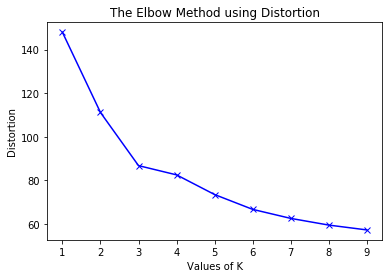

In [33]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [ ]:
#Since the Elbow curve has a steep rise at 3,so 3 is the optimum number of clusters